# Experience 1

### Importation des librairies

In [1]:
import os
import cartopy.crs as ccrs
import sys
import glob
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns

### Téléchargement des données

In [3]:
#Repertoire ou le fichier se trouve
path_file='C:/Users/useem/OneDrive - UQAM/08- Automne 2025/SCA5460 - Laboratoire 3/Experience 1/imerg_pr_201911_3h.nc4'

# Nom de la variable
var_name='precipitationCal'

# Pour lire le fichier
print('Reading file: ',path_file)
ds_i = xr.open_dataset(path_file)
ds_i.close()
print('Reading file: DONE')
precipitation = ds_i[var_name]
lons = ds_i['lon']
lats = ds_i['lat']
ds_i.head()

Reading file:  C:/Users/useem/OneDrive - UQAM/08- Automne 2025/SCA5460 - Laboratoire 3/Experience 1/imerg_pr_201911_3h.nc4
Reading file: DONE


<xarray.Dataset> Size: 660B
Dimensions:           (time: 5, bnds: 2, lon: 5, lat: 5)
Coordinates:
  * time              (time) datetime64[ns] 40B 2019-11-01 ... 2019-11-01T12:...
  * lon               (lon) float32 20B -179.9 -179.9 -179.8 -179.6 -179.6
  * lat               (lat) float32 20B -89.95 -89.85 -89.75 -89.65 -89.55
Dimensions without coordinates: bnds
Data variables:
    time_bnds         (time, bnds) datetime64[ns] 80B ...
    precipitationCal  (time, lat, lon) float32 500B ...
Attributes:
    CDI:          Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/...
    history:      Mon Sep 27 17:58:00 2021: cdo --timestat_date first -L -f n...
    Conventions:  CF-1.6
    FileHeader:   DOI=10.5067/GPM/IMERG/3B-HH/06;\nDOIauthority=http://dx.doi...
    FileInfo:     DataFormatVersion=6a;\nTKCodeBuildVersion=0;\nMetadataVersi...
    GridHeader:   BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatitudeR...
    CDO:          Climate Data Operators version 1.9.5 (http://mpimet.mpg.de/...

### Série temporelle pour kuala Lumpur

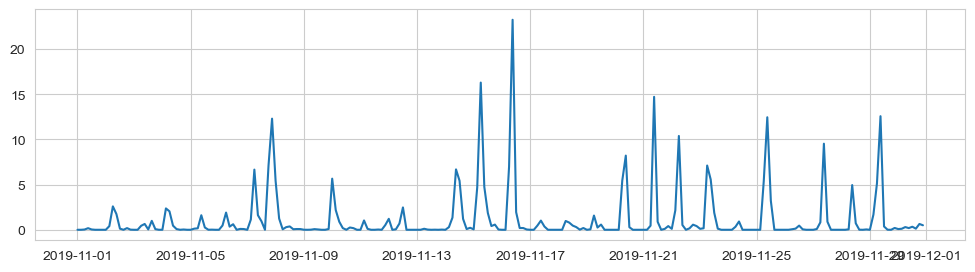

In [35]:
data_all_args = ds_i['precipitationCal'].sel(lat=3.1, lon=101.6, method='nearest')
temps = ds_i['time']
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(temps,data_all_args)

### Série temporelle pour Montréal